In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
data=pd.read_csv('C:\\Users\\anupa\\OneDrive - vit.ac.in\\Notebooks\\PROJECTS\\SET\\SURVEY ON INDIAN EDUCATION SYSTEM.csv')

In [3]:
df=pd.DataFrame(data)

In [4]:
# Create new pandas DataFrame.
df2 = df[["Provide your views on university entrance examinations"]]
df2.head()
df2.tail()

,Provide your views on university entrance examinations
141,Very competitive
142,"More than entrance exam, we need to do persona..."
143,It's good
144,It's good
145,Should be more stringent as it was mostly base...


In [5]:
# Step 1: Cleaning the text
# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

# Cleaning the text in the review column
df2['Cleaned Reviews'] = df2["Provide your views on university entrance examinations"].dropna().apply(clean)
print(df2['Cleaned Reviews'])

0      It may look like a discrimination but it s an ...
1      Entrance exam is very important according to m...
2      They re pretty well made appropriately for the...
3      It may not be a right way of choosing people b...
4      They should stop assigning marks based on leng...
                             ...                        
141                                    Very competitive 
142    More than entrance exam we need to do personal...
143                                            It s good
144                                           It s good 
145    Should be more stringent as it was mostly base...
Name: Cleaned Reviews, Length: 146, dtype: object


<ipython-input-5-bb29a2a04517>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Cleaned Reviews'] = df2["Provide your views on university entrance examinations"].dropna().apply(clean)


In [6]:
# Step 2: Tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anupa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anupa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anupa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\anupa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [7]:
get_ipython().system('pip install -U textblob')

In [8]:
# POS tagger dictionary

from textblob import TextBlob

pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def pos_tagger(sentence):
    sent = TextBlob(sentence)
    tag_dict = {"J": 'a', "N": 'n', "V": 'v', "R": 'r'}
    words_tags = [(w, tag_dict.get(pos[0], 'n')) for w, pos in sent.tags]   
    lemma_list = [wd.lemmatize(tag) for wd, tag in words_tags]
    return lemma_list

In [9]:
df2['POS tagged'] = df2['Cleaned Reviews'].dropna().apply(pos_tagger)
print(df2['POS tagged'])

def token_stop_pos(list1):
    tags=pos_tag(list1)
    newlist = []
    for word, tag in tags :
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

df2['POS stopword']=df2['POS tagged'].dropna().apply(token_stop_pos)
print(str(df2['POS stopword']))

<ipython-input-9-e0a35f4bd3a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['POS tagged'] = df2['Cleaned Reviews'].dropna().apply(pos_tagger)


0      [It, may, look, like, a, discrimination, but, ...
1      [Entrance, exam, be, very, important, accord, ...
2      [They, re, pretty, well, make, appropriately, ...
3      [It, may, not, be, a, right, way, of, choose, ...
4      [They, should, stop, assign, mark, base, on, l...
                             ...                        
141                                  [Very, competitive]
142    [More, than, entrance, exam, we, need, to, do,...
143                                        [It, s, good]
144                                        [It, s, good]
145    [Should, be, more, stringent, a, it, be, mostl...
Name: POS tagged, Length: 146, dtype: object
0      [(may, None), (look, v), (like, None), (discri...
1      [(Entrance, n), (exam, n), (important, a), (ac...
2      [(pretty, r), (well, r), (make, v), (appropria...
3      [(may, None), (right, a), (way, n), (choose, a...
4      [(stop, v), (assign, n), (mark, n), (base, n),...
                             ...           

<ipython-input-9-e0a35f4bd3a9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['POS stopword']=df2['POS tagged'].dropna().apply(token_stop_pos)


In [10]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df2['Lemma'] = df2['POS stopword'].dropna().apply(lemmatize)
df2.head()

<ipython-input-10-088efdd1ecab>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Lemma'] = df2['POS stopword'].dropna().apply(lemmatize)


,Provide your views on university entrance examinations,Cleaned Reviews,POS tagged,POS stopword,Lemma
0,"It may look like a discrimination, but it's an...",It may look like a discrimination but it s an ...,"[It, may, look, like, a, discrimination, but, ...","[(may, None), (look, v), (like, None), (discri...",may look like discrimination absolute necess...
1,Entrance exam is very important according to m...,Entrance exam is very important according to m...,"[Entrance, exam, be, very, important, accord, ...","[(Entrance, n), (exam, n), (important, a), (ac...",Entrance exam important accord u score well ...
2,They're pretty well made appropriately for the...,They re pretty well made appropriately for the...,"[They, re, pretty, well, make, appropriately, ...","[(pretty, r), (well, r), (make, v), (appropria...",pretty well make appropriately institute
3,It may not be a right way of choosing people b...,It may not be a right way of choosing people b...,"[It, may, not, be, a, right, way, of, choose, ...","[(may, None), (right, a), (way, n), (choose, a...",may right way choose people base solely perf...
4,They should stop assigning marks based on leng...,They should stop assigning marks based on leng...,"[They, should, stop, assign, mark, base, on, l...","[(stop, v), (assign, n), (mark, n), (base, n),...",stop assign mark base length answer honestly...


In [11]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity 
 #Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
   #Create two new columns ‘Subjectivity’ & ‘Polarity’
df2['TextBlob_Subjectivity'] =  df2['Lemma'].dropna().apply(getSubjectivity)
df2['TextBlob_Polarity'] = df2['Lemma'].dropna().apply(getPolarity)
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
df2['TextBlob_Analysis'] = df2['TextBlob_Polarity'].dropna().apply(getAnalysis )
df2.head() 

<ipython-input-11-0ffc8947ad6a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TextBlob_Subjectivity'] =  df2['Lemma'].dropna().apply(getSubjectivity)
<ipython-input-11-0ffc8947ad6a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TextBlob_Polarity'] = df2['Lemma'].dropna().apply(getPolarity)
<ipython-input-11-0ffc8947ad6a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

,Provide your views on university entrance examinations,Cleaned Reviews,POS tagged,POS stopword,Lemma,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
0,"It may look like a discrimination, but it's an...",It may look like a discrimination but it s an ...,"[It, may, look, like, a, discrimination, but, ...","[(may, None), (look, v), (like, None), (discri...",may look like discrimination absolute necess...,0.578333,-0.220000,Negative
1,Entrance exam is very important according to m...,Entrance exam is very important according to m...,"[Entrance, exam, be, very, important, accord, ...","[(Entrance, n), (exam, n), (important, a), (ac...",Entrance exam important accord u score well ...,1.000000,0.400000,Positive
2,They're pretty well made appropriately for the...,They re pretty well made appropriately for the...,"[They, re, pretty, well, make, appropriately, ...","[(pretty, r), (well, r), (make, v), (appropria...",pretty well make appropriately institute,0.750000,0.375000,Positive
3,It may not be a right way of choosing people b...,It may not be a right way of choosing people b...,"[It, may, not, be, a, right, way, of, choose, ...","[(may, None), (right, a), (way, n), (choose, a...",may right way choose people base solely perf...,0.674107,-0.008929,Negative
4,They should stop assigning marks based on leng...,They should stop assigning marks based on leng...,"[They, should, stop, assign, mark, base, on, l...","[(stop, v), (assign, n), (mark, n), (base, n),...",stop assign mark base length answer honestly...,0.950000,-0.100000,Negative


In [25]:
df3=df2
file_name='entrance_exam_senti1.xlsx'
df3.to_excel(file_name)

In [12]:
tb_counts=df2['TextBlob_Analysis'].value_counts()
print(tb_counts)

Positive    56
Neutral     56
Negative    32
Name: TextBlob_Analysis, dtype: int64


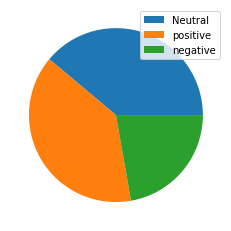

In [13]:
plt.pie(tb_counts)
plt.legend(['Neutral','positive','negative'])
plt.show()

In [14]:
df3=df2.copy()
print(df3.head())

  Provide your views on university entrance examinations  \
0  It may look like a discrimination, but it's an...       
1  Entrance exam is very important according to m...       
2  They're pretty well made appropriately for the...       
3  It may not be a right way of choosing people b...       
4  They should stop assigning marks based on leng...       

                                     Cleaned Reviews  \
0  It may look like a discrimination but it s an ...   
1  Entrance exam is very important according to m...   
2  They re pretty well made appropriately for the...   
3  It may not be a right way of choosing people b...   
4  They should stop assigning marks based on leng...   

                                          POS tagged  \
0  [It, may, look, like, a, discrimination, but, ...   
1  [Entrance, exam, be, very, important, accord, ...   
2  [They, re, pretty, well, make, appropriately, ...   
3  [It, may, not, be, a, right, way, of, choose, ...   
4  [They, should, stop

In [15]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [16]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']
df3['Vader Sentiment'] = df3["Provide your views on university entrance examinations"].dropna().apply(vadersentimentanalysis)
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
df3['Vader Analysis'] = df3['Vader Sentiment'].dropna().apply(vader_analysis)
df3.head()

,Provide your views on university entrance examinations,Cleaned Reviews,POS tagged,POS stopword,Lemma,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis,Vader Sentiment,Vader Analysis
0,"It may look like a discrimination, but it's an...",It may look like a discrimination but it s an ...,"[It, may, look, like, a, discrimination, but, ...","[(may, None), (look, v), (like, None), (discri...",may look like discrimination absolute necess...,0.578333,-0.220000,Negative,-0.6124,Negative
1,Entrance exam is very important according to m...,Entrance exam is very important according to m...,"[Entrance, exam, be, very, important, accord, ...","[(Entrance, n), (exam, n), (important, a), (ac...",Entrance exam important accord u score well ...,1.000000,0.400000,Positive,0.0719,Neutral
2,They're pretty well made appropriately for the...,They re pretty well made appropriately for the...,"[They, re, pretty, well, make, appropriately, ...","[(pretty, r), (well, r), (make, v), (appropria...",pretty well make appropriately institute,0.750000,0.375000,Positive,0.6486,Positive
3,It may not be a right way of choosing people b...,It may not be a right way of choosing people b...,"[It, may, not, be, a, right, way, of, choose, ...","[(may, None), (right, a), (way, n), (choose, a...",may right way choose people base solely perf...,0.674107,-0.008929,Negative,0.9509,Positive
4,They should stop assigning marks based on leng...,They should stop assigning marks based on leng...,"[They, should, stop, assign, mark, base, on, l...","[(stop, v), (assign, n), (mark, n), (base, n),...",stop assign mark base length answer honestly...,0.950000,-0.100000,Negative,0.2023,Neutral


In [17]:
vader_counts = df3['Vader Analysis'].value_counts()
vader_counts

Neutral     124
Positive     17
Negative      3
Name: Vader Analysis, dtype: int64

In [18]:
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn
def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue
        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue
            # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
        print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
        if not tokens_count:
            return 0
        if sentiment>0:
            return "Positive"
        if sentiment==0:
            return "Neutral"
        else:
            return "Negative"

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\anupa\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


In [19]:
df3['SWN analysis'] = df3['POS stopword'].dropna().apply(sentiwordnetanalysis)

0.0 0.0 1.0
0.0 0.0 1.0
0.125 0.25 0.625
0.0 0.0 1.0
0.0 0.0 1.0
0.125 0.125 0.75
0.0 0.0 1.0
0.75 0.0 0.25
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.125 0.125 0.75
0.75 0.0 0.25
0.0 0.0 1.0
0.0 0.625 0.375
0.0 0.0 1.0
0.25 0.25 0.5
0.0 0.0 1.0
0.25 0.25 0.5
0.0 0.0 1.0
0.0 0.0 1.0
0.75 0.0 0.25
0.0 0.75 0.25
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.75 0.0 0.25
0.75 0.0 0.25
0.25 0.25 0.5
0.0 0.0 1.0
0.75 0.0 0.25
0.25 0.5 0.25
0.25 0.25 0.5
0.625 0.0 0.375
0.0 0.0 1.0
0.0 0.5 0.5
0.0 0.0 1.0
0.0 0.0 1.0
0.625 0.0 0.375
0.75 0.0 0.25
0.0 0.0 1.0
0.75 0.0 0.25
0.0 0.0 1.0
0.875 0.0 0.125
0.0 0.0 1.0
0.0 0.625 0.375
0.75 0.0 0.25
0.75 0.0 0.25
0.0 0.0 1.0
0.0 0.0 1.0
0.625 0.0 0.375
0.0 0.0 1.0
0.0 0.625 0.375
0.125 0.0 0.875
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.75 0.0 0.25
0.0 0.0 1.0
0.75 0.0 0.25
0.625 0.0 0.375
0.0 0.0 1.0
0.75 0.0 0.25
0.0 0.0 1.0
0.0 0.5 0.5
0.75 0.0 0.25
0.0 0.625 0.375
0.0 0.0 1.0
0.875 0.0 0.125
0.75 0.0 0.25

In [20]:
swn_counts= df3['SWN analysis'].value_counts()
swn_counts

Neutral     85
Positive    39
Negative    15
Name: SWN analysis, dtype: int64

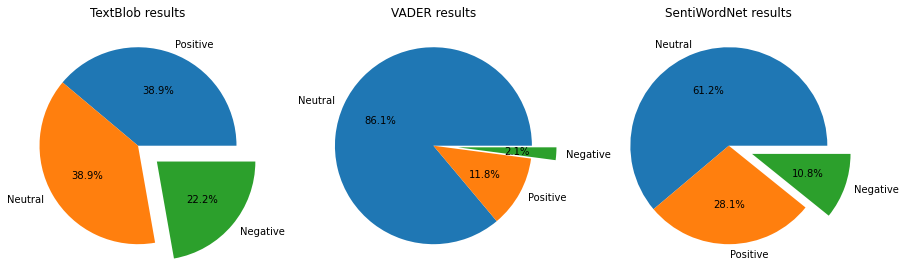

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,2)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0,0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,3)
plt.title("SentiWordNet results")
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.show()